In [1]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [2]:
# Given parameters
nx = 60
ny = 60
tf = 5.0
dt = 1.0e-2
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_uniform_result = "../__result/ex23_wave/ex23_POD_inner_uniform_gappy_result.p"
file_name_SVD="../__model/ex23_wave/ex23_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# of measurments: 12
[  61   90  118 1201 1230 1258 2341 2370 2398 3481 3510 3538]


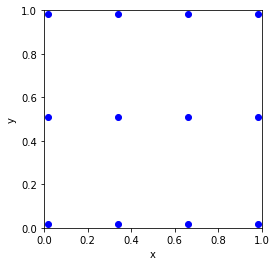

In [3]:
# uniform
msmt_i,msmt_j=np.meshgrid([1,30,58],[1,20,39,58],indexing='xy')
msmt_idx = np.sort(np.ravel_multi_index((msmt_j.flatten(),msmt_i.flatten()),dims))

num_msmt=len(msmt_idx)
print("# of measurments: {}".format(num_msmt))
print(msmt_idx)

# plot measuremnt positions
plt.figure()
plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
plt.axis('square')
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("../__result/ex23_wave/ex23_POD_uniform_{}_samples.png".format(num_msmt))

# gappyPOD

# of POD basis is 3
# of measurments: 12
[  61   90  118 1201 1230 1258 2341 2370 2398 3481 3510 3538]


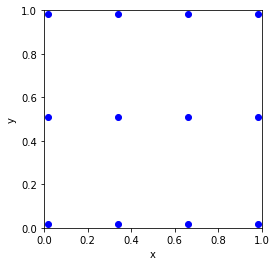

Param is 75
Time elapsed: 0.6397445201873779 sec
average relative error of u: 4.3793053820442935%
maximum relative error of u: 5.961213529042007%

Param is 76
Time elapsed: 0.5888710021972656 sec
average relative error of u: 4.232657429267482%
maximum relative error of u: 5.801231600345788%

Param is 77
Time elapsed: 0.6081094741821289 sec
average relative error of u: 4.103330197588676%
maximum relative error of u: 5.654950805145226%

Param is 78
Time elapsed: 0.5468404293060303 sec
average relative error of u: 3.9940930016378995%
maximum relative error of u: 5.524599339296724%

Param is 79
Time elapsed: 0.6963438987731934 sec
average relative error of u: 3.907869306852252%
maximum relative error of u: 5.412483700995425%

Param is 80
Time elapsed: 0.5871386528015137 sec
average relative error of u: 3.847321945301954%
maximum relative error of u: 5.320722397506772%

Param is 81
Time elapsed: 0.608745813369751 sec
average relative error of u: 3.8148224576782486%
maximum relative error of

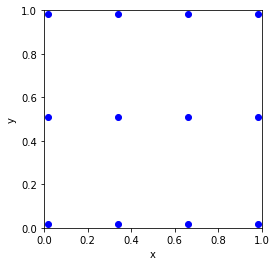

Param is 75
Time elapsed: 0.6868975162506104 sec
average relative error of u: 4.072330450808241%
maximum relative error of u: 5.712368617239127%

Param is 76
Time elapsed: 0.703075647354126 sec
average relative error of u: 4.001046918826247%
maximum relative error of u: 5.629937875417266%

Param is 77
Time elapsed: 0.6277468204498291 sec
average relative error of u: 3.9356240966259053%
maximum relative error of u: 5.547927474076446%

Param is 78
Time elapsed: 0.7883248329162598 sec
average relative error of u: 3.876951949214004%
maximum relative error of u: 5.466492482461063%

Param is 79
Time elapsed: 0.678192138671875 sec
average relative error of u: 3.826069100835151%
maximum relative error of u: 5.385778414247551%

Param is 80
Time elapsed: 0.5996720790863037 sec
average relative error of u: 3.7839404591101773%
maximum relative error of u: 5.305893546307391%

Param is 81
Time elapsed: 0.5193290710449219 sec
average relative error of u: 3.7515598431516466%
maximum relative error of 

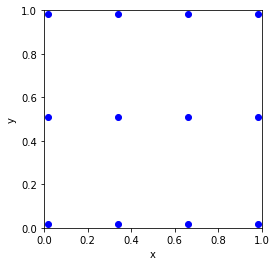

Param is 75
Time elapsed: 0.6958801746368408 sec
average relative error of u: 4.160999204220709%
maximum relative error of u: 5.834039893668245%

Param is 76
Time elapsed: 0.6395471096038818 sec
average relative error of u: 4.10065369718191%
maximum relative error of u: 5.74566843929768%

Param is 77
Time elapsed: 0.6707718372344971 sec
average relative error of u: 4.040327842463206%
maximum relative error of u: 5.657505670484378%

Param is 78
Time elapsed: 0.6217076778411865 sec
average relative error of u: 3.9800225942610172%
maximum relative error of u: 5.569691891549958%

Param is 79
Time elapsed: 0.6755392551422119 sec
average relative error of u: 3.9198654903269734%
maximum relative error of u: 5.48236894381298%

Param is 80
Time elapsed: 0.6324400901794434 sec
average relative error of u: 3.8599001509054305%
maximum relative error of u: 5.395633464717753%

Param is 81
Time elapsed: 0.666710615158081 sec
average relative error of u: 3.8001876042270024%
maximum relative error of u

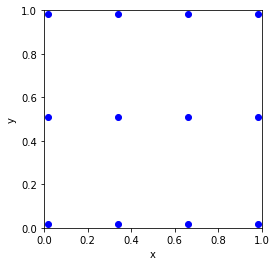

Param is 75
Time elapsed: 0.6019625663757324 sec
average relative error of u: 3.1227774780764825%
maximum relative error of u: 4.4893933669149995%

Param is 76
Time elapsed: 0.6410911083221436 sec
average relative error of u: 3.083177463497748%
maximum relative error of u: 4.432302090547189%

Param is 77
Time elapsed: 0.5582354068756104 sec
average relative error of u: 3.0432812630001895%
maximum relative error of u: 4.374823010119191%

Param is 78
Time elapsed: 0.5676629543304443 sec
average relative error of u: 3.0030322688964666%
maximum relative error of u: 4.316845027456071%

Param is 79
Time elapsed: 0.656933069229126 sec
average relative error of u: 2.962556624569819%
maximum relative error of u: 4.258556026498282%

Param is 80
Time elapsed: 0.508350133895874 sec
average relative error of u: 2.9218617508219817%
maximum relative error of u: 4.199980618197179%

Param is 81
Time elapsed: 0.5455577373504639 sec
average relative error of u: 2.8810192189491923%
maximum relative error 

In [4]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))

    # uniform
    msmt_i,msmt_j=np.meshgrid([1,30,58],[1,20,39,58],indexing='xy')
    msmt_idx = np.sort(np.ravel_multi_index((msmt_j.flatten(),msmt_i.flatten()),dims))

    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex23_wave/ex23_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_uniform_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [5]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

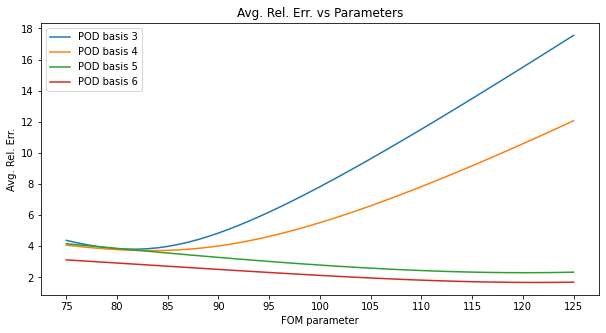

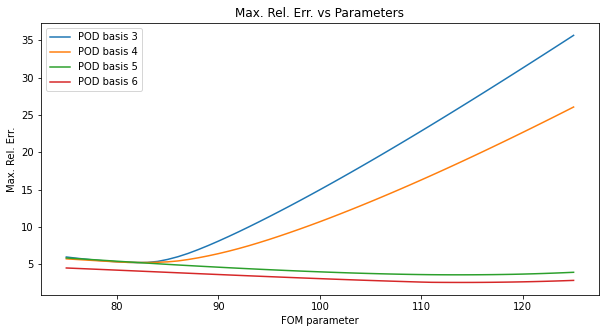

In [7]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_inner_uniform_avg_rel_err.png")

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_inner_uniform_max_rel_err.png")

In [8]:
idx=[3]
POD_basis=num_basis[idx]
print(POD_basis)

[6]


Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

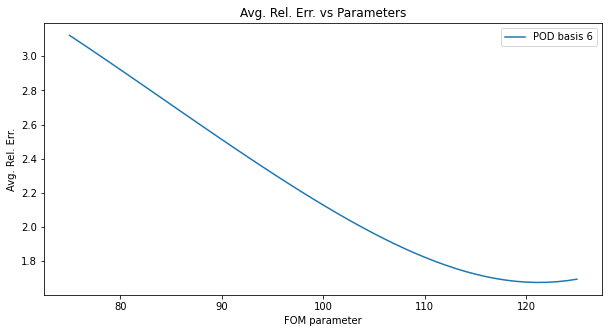

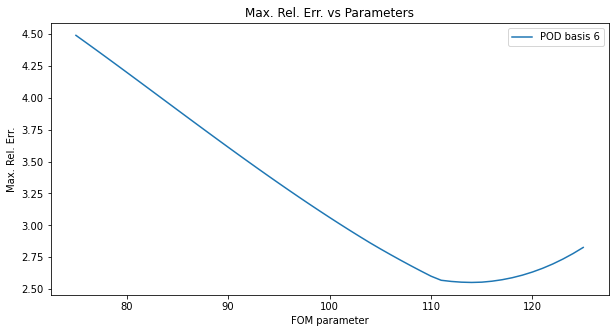

In [9]:
# with open(file=file_path_gappy_uniform_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_uniform_avg_rel_err.png".format(POD_basis))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_uniform_max_rel_err.png".format(POD_basis))

In [10]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


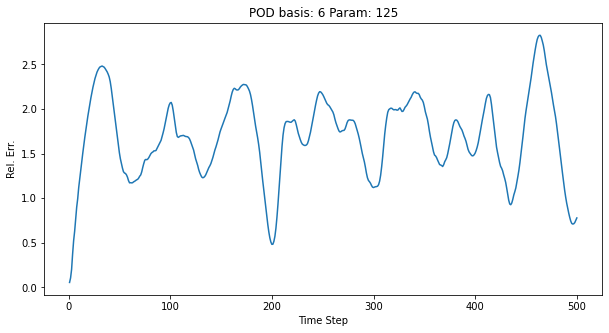

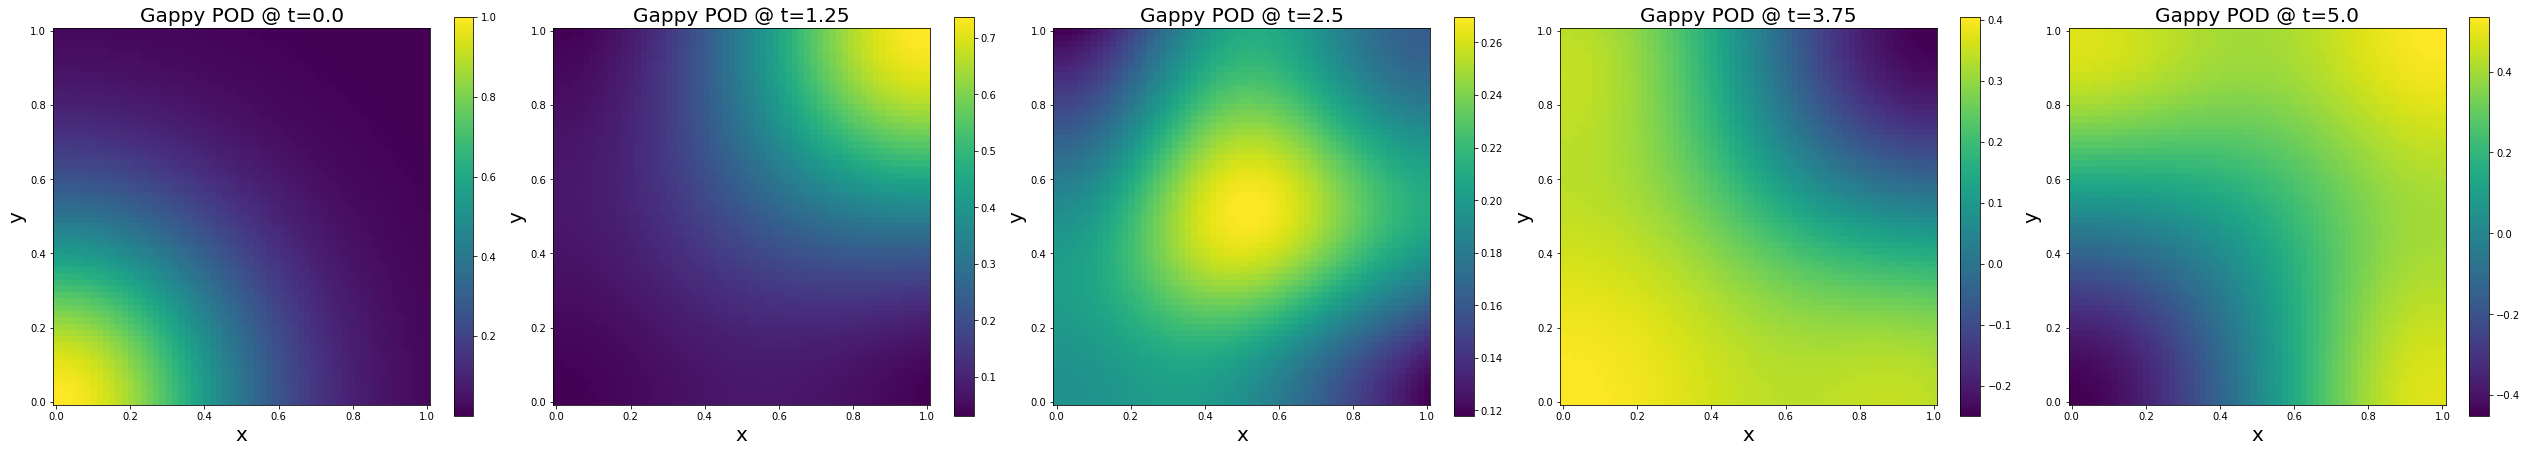

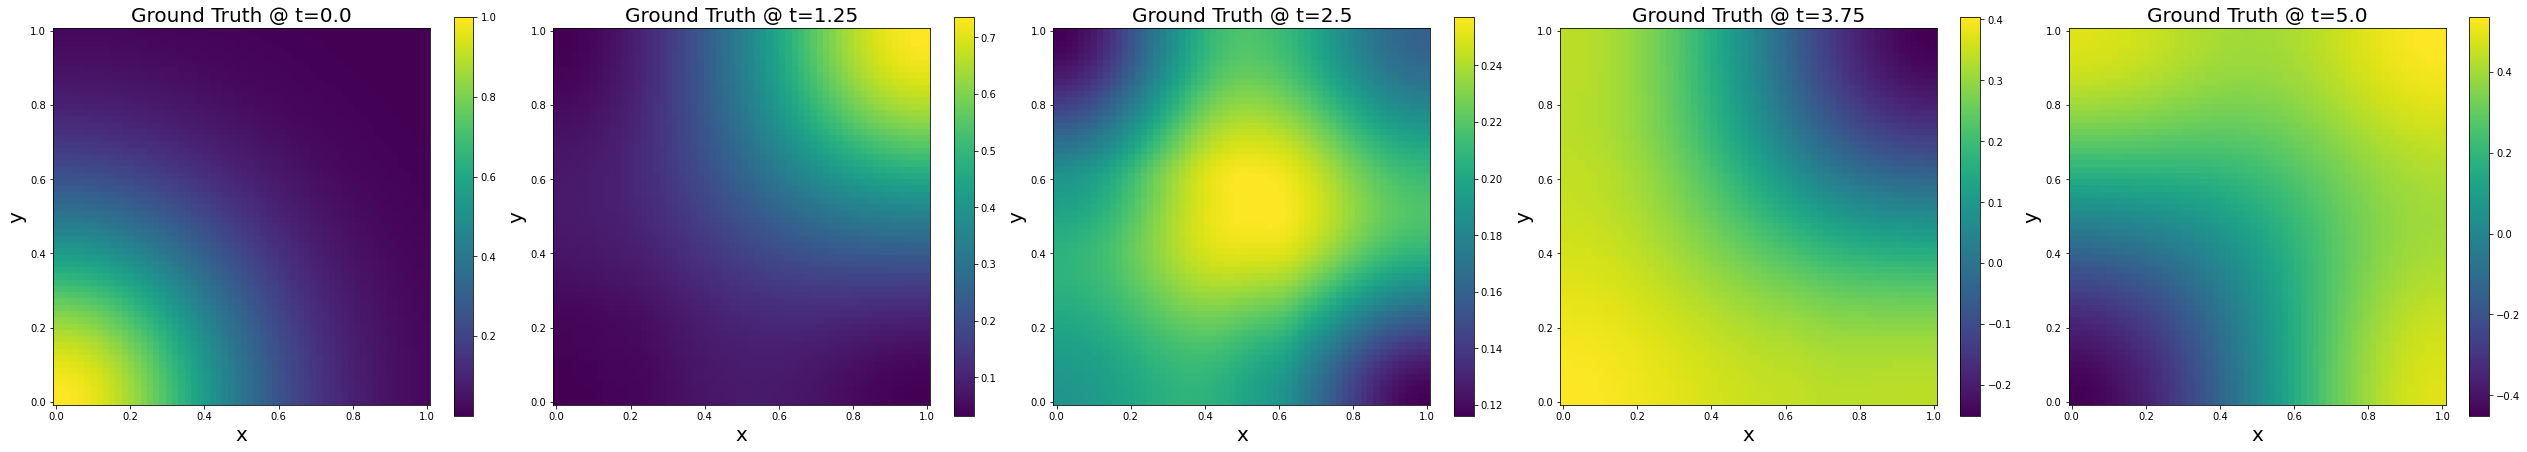

In [12]:
# figure rel.err vs at given param and POD basis
i=3;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex23_wave/ex23_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=-1; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex23_wave/ex23_POD_{}_param_{}_inner_uniform_SOL.png".format(POD_basis,param))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx))#,vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)
    fig.colorbar(pcm, ax=ax,shrink=0.8)

# fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex23_wave/ex23_param_{}_ground_truth.png".format(param))